In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/ex1data1.csv'
data = pd.read_csv(data_path, names=['x', 'y'])
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.shape

(97, 2)

In [4]:
x = data['x']
y = data['y']
m = len(x)

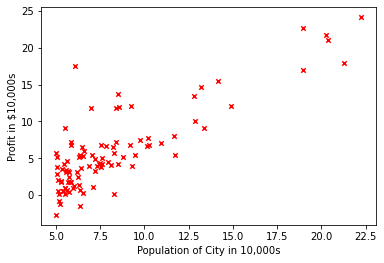

In [5]:
plt.scatter(x, y, s=20, c='r', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [6]:
def cost(w, b):
    cost = 0
    for i in range(0, m):
        cost += (w * x[i] + b - y[i]) ** 2 / (m * 2)
    
    return cost


cost(0, 0)

32.072733877455676

In [7]:
def fgradient(w, b):
    gradient = [0, 0]
    for i in range(0, m):
        gradient[0] += ((w * x[i] + b - y[i]) * x[i]) / m
        gradient[1] += (w * x[i] + b - y[i]) / m 
    
    return gradient

fgradient(0, 0)

[-65.32884974555671, -5.839135051546393]

In [8]:
def gradient_descent(w, b, alpha, num_iters):
    w_hist = np.array([w])
    b_hist = np.array([b])
    cost_hist = np.array([cost(w, b)])
    
    for i in range(0, num_iters):
        w = w_hist[-1]
        b = b_hist[-1]

        gradient = fgradient(w, b)
        w = w - alpha * gradient[0]
        b = b - alpha * gradient[1]
        
        w_hist = np.append(w_hist, w)
        b_hist = np.append(b_hist, b)
        cost_hist = np.append(cost_hist, cost(w, b))
        
        if not gradient[0] and not gradient[1]:
            break
    
    return (w_hist, b_hist, cost_hist)

w = 0
b = 0
alpha = 0.01
iterations = 1500
w_hist, b_hist, cost_hist = gradient_descent(w, b, alpha, iterations)

In [9]:
w = w_hist[-1]
b = b_hist[-1]
w, b

(1.166362350335582, -3.630291439404361)

array([32.07273388,  6.73719046,  5.93159357, ...,  4.48343473,
        4.48341145,  4.48338826])

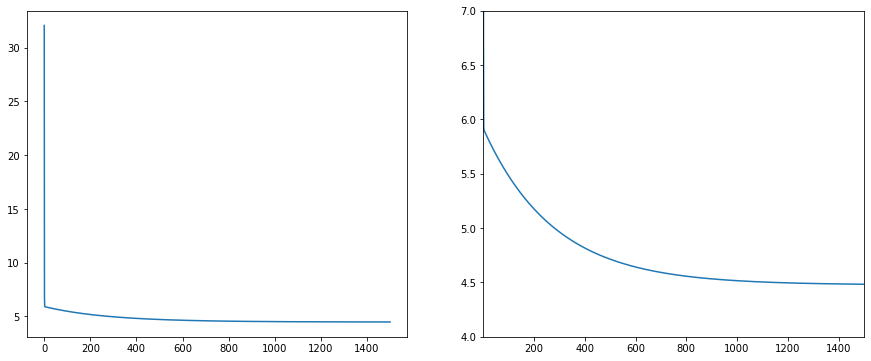

In [10]:
cost_x = np.arange(0, len(cost_hist), 1)
fig, axs = plt.subplots(1, 2, figsize=(15,6))
for i in range(0, 2):
    axs[i].plot(cost_x, cost_hist)
axs[1].set_xlim(1, 1500)
axs[1].set_ylim(4, 7)
cost_hist

(1.166362350335582, -3.630291439404361)

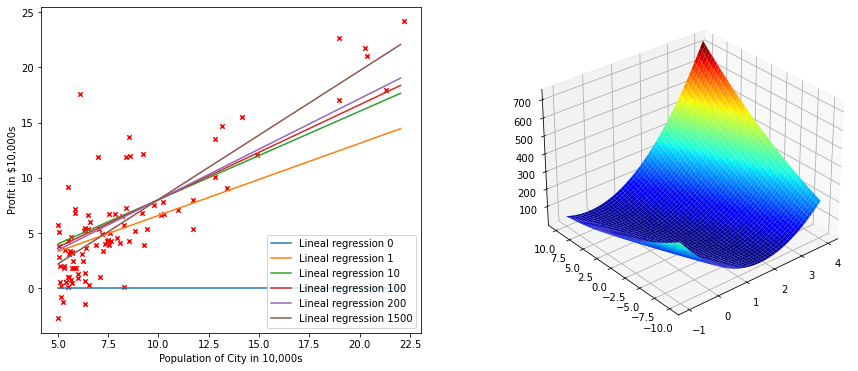

In [11]:
fig = plt.figure(figsize=(15, 6))

# Left plot
ax1 = fig.add_subplot(121)
x_range = np.arange(min(x), max(x))
y_range = w * x_range + b
ax1.scatter(x, y, s=20, c='r', marker='x')
for i in [0, 1, 10, 100, 200, 1500]:
    ax1.plot(x_range, w_hist[i] * x_range + b_hist[i], label=f'Lineal regression {i}')
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s')
ax1.legend(loc=4)

#Right plot
from mpl_toolkits.mplot3d import axes3d

ax2 = fig.add_subplot(122, projection='3d')
w_range = np.linspace(-1, 4, 50)
b_range = np.linspace(-10, 10, 50)
w_grid, b_grid = np.meshgrid(w_range, b_range, indexing='xy')
cost_range = np.zeros((w_range.size, b_range.size))

for(i, j), v in np.ndenumerate(cost_range):
    cost_range[i,j] = cost(w_grid[i,j], b_grid[i,j])

ax2.plot_surface(w_grid, b_grid, cost_range, cmap=plt.cm.jet)
ax2.view_init(elev=30, azim=230)

w_hist[-1], b_hist[-1]